# [Probability and statistics](http://gluon.mxnet.io/chapter01_crashcourse/probability.html)

In some form or another, machine learning is all about making predictions.  
We might want to predict the probability of a patient suffering a heart attack in the next year, given their clinical history.  
In anomaly detection, we might want to assess how likely a set of readings from an airplane’s jet engine would be, were it operating normally.  
In reinforcement learning, we want an agent to act intelligently in an environment.  
This means we need to think about the probability of getting a high reward under each of the available action.  
And when we build recommender systems we also need to think about probability.  
For example, if we hypothetically worked for a large online bookseller, we might want to estimate the probability that a particular user would buy a particular book, if prompted.  

For this we need to use the language of probability and statistics.  
Entire courses, majors, theses, careers, and even departments, are devoted to probability.  
So our goal here isn’t to teach the whole subject.  
Instead we hope to get you off the ground, to teach you just enough that you know everything necessary to start building your first machine learning models and to have enough of a flavor for the subject that you can begin to explore it on your own if you wish.  
We’ve talked a lot about probabilities so far without articulating what precisely they are or giving a concrete example.  
Let’s get more serious by considering the problem of distinguishing cats and dogs based on photographs.  
This might sound simpler but it’s actually a formidable challenge.  
To start with, the difficulty of the problem may depend on the resolution of the image.

![](img/cats_and_dogs.png)

While it’s easy for humans to recognize cats and dogs at 320 pixel resolution, it becomes challenging at 40 pixels and next to impossible at 20 pixels.  
In other words, our ability to tell cats and dogs apart at a large distance (and thus low resolution) might approach uninformed guessing.  
Probability gives us a formal way of reasoning about our level of certainty.  
If we are completely sure that the image depicts a cat, we say that the probability that the corresponding label l is cat, denoted $P(l=\mathrm{cat})$ equals 1.0.  
If we had no evidence to suggest that $l=\mathrm{cat}$ or that $l=\mathrm{dog}$, then we might say that the two possibilities were equally likely expressing this as $P(l=\mathrm{cat})=0.5$.  
If we were reasonably confident, but not sure that the image depicted a cat, we might assign a probability $.5<P(l=\mathrm{cat})<1.0$.

Now consider a second case: given some weather monitoring data, we want to predict the probability that it will rain in Taipei tomorrow.  
If it’s summertime, the rain might come with probability $.5$.  
In both cases, we have some value of interest.  
And in both cases we are uncertain about the outcome.  
But there’s a key difference between the two cases.  
In this first case, the image is in fact either a dog or a cat, we just don’t know which.  
In the second case, the outcome may actually be a random event, if you believe in such things (and most physicists do).  
So probability is a flexible language for reasoning about our level of certainty, and it can be applied effectively in a broad set of contexts.  

## Basic probability theory

Say that we cast a die and want to know what the chance is of seeing a $1$ rather than another digit.  
If the die is fair, all six outcomes ${X} = \{1, \ldots, 6\}$ are equally likely to occur, hence we would see a $1$ in $1$ out of $6$ cases.  
Formally we state that 1 occurs with probability $\frac{1}{6}$.  
For a real die that we receive from a factory, we might not know those proportions and we would need to check whether it is tainted.  
The only way to investigate the die is by casting it many times and recording the outcomes.  
For each cast of the die, we’ll observe a value $\{1, 2, \ldots, 6\}$.  

Given these outcomes, we want to investigate the probability of observing each outcome.  
One natural approach for each value is to take the individual count for that value and to divide it by the total number of tosses.  
This gives us an estimate of the probability of a given event.  
The law of large numbers tell us that as the number of tosses grows this estimate will draw closer and closer to the true underlying probability.  
Before going into the details of what’s going here, let’s try it out.  
We can start by importing the necessary packages:

In [1]:
import mxnet as mx
from mxnet import nd

Next, we’ll want to be able to cast the die.  
In statistics we call this process of drawing examples from probability distributions *sampling*.  
The distribution which assigns probabilities to a number of discrete choices is called the *multinomial distribution*.  
We’ll give a more formal definition of *distribution* later, but at a high level, think of it as just an assignment of probabilities to events.  
In MXNet, we can sample from the multinomial distribution via the aptly named `nd.sample_multinomial` function.  
The function can be called in many ways, but we’ll focus on the simplest.  
To draw a single sample, we simply pass in a vector of probabilities.

In [2]:
probabilities = nd.ones(6) / 6
print(probabilities)
nd.sample_multinomial(probabilities)


[ 0.16666667  0.16666667  0.16666667  0.16666667  0.16666667  0.16666667]
<NDArray 6 @cpu(0)>



[3]
<NDArray 1 @cpu(0)>

If you run the line (`nd.sample_multinomial(probabilities)`) a bunch of times, you’ll find that you get out random values each time.  
As with estimating the fairness of a die, we often want to generate many samples from the same distribution.  
It would be really slow to do this with a Python `for` loop, so `sample_multinomial` supports drawing multiple samples at once, returning an array of independent samples in any shape we might desire.  

In [3]:
print(nd.sample_multinomial(probabilities, shape=(10)))
print(nd.sample_multinomial(probabilities, shape=(5,10)))


[3 4 5 3 5 3 5 2 3 3]
<NDArray 10 @cpu(0)>

[[2 2 1 5 0 5 1 2 2 4]
 [4 3 2 3 2 5 5 0 2 0]
 [3 0 2 4 5 4 0 5 5 5]
 [2 4 4 2 3 4 4 0 4 3]
 [3 0 3 5 4 3 0 2 2 1]]
<NDArray 5x10 @cpu(0)>


Now that we know how to sample rolls of a die, we can simulate 1000 rolls.

In [4]:
rolls = nd.sample_multinomial(probabilities, shape=(1000))
rolls


[1 4 4 2 1 3 0 0 1 3 0 3 1 3 2 5 5 4 2 2 3 2 5 4 0 0 5 4 3 4 1 1 2 0 4 1 3
 2 1 3 0 2 3 5 5 0 3 1 3 0 5 3 3 1 2 2 2 1 3 0 2 0 4 3 1 0 4 1 5 2 3 4 0 0
 3 5 4 0 5 5 5 2 3 5 0 3 2 4 0 0 2 1 5 0 2 1 2 0 4 1 5 2 5 0 1 4 3 3 5 1 3
 3 5 0 5 3 0 5 1 1 0 4 5 0 3 4 5 1 1 1 2 3 3 0 0 4 2 0 0 4 3 1 4 4 1 5 2 1
 4 3 2 3 5 3 3 1 5 5 4 2 2 5 5 4 0 1 4 4 2 2 4 5 1 3 1 5 5 4 3 4 3 3 3 5 1
 3 2 2 3 3 2 0 2 1 4 3 1 1 2 3 4 2 5 0 0 1 0 3 2 3 3 3 0 3 5 3 1 2 1 5 0 2
 0 2 5 5 1 4 3 4 2 0 0 5 2 4 2 5 5 0 5 5 0 0 3 3 1 0 4 5 5 4 2 3 0 2 0 0 5
 4 2 2 2 4 0 5 2 5 0 5 1 0 4 2 5 4 4 1 2 3 2 0 2 1 1 0 1 4 2 1 5 2 5 5 3 4
 3 0 4 0 3 3 0 3 4 1 5 5 1 3 4 3 5 3 4 4 5 1 3 2 1 1 1 1 1 5 3 4 2 2 5 1 4
 1 0 0 0 2 2 1 5 4 5 2 3 1 3 0 5 0 4 4 2 2 4 3 3 5 4 5 2 1 2 3 5 1 0 0 1 4
 5 1 5 2 3 3 1 4 3 3 0 5 1 1 2 4 5 1 4 5 2 4 2 1 4 5 1 4 5 1 1 1 5 3 2 0 4
 1 0 2 4 2 3 2 1 1 1 3 4 5 4 0 4 3 1 0 1 4 4 2 2 3 5 1 1 0 0 2 0 2 4 5 0 4
 4 4 0 5 1 0 4 3 4 3 0 5 1 1 1 1 4 0 0 0 3 5 0 4 4 4 5 1 4 3 1 0 3 2 3 5 4
 5 3 2 1 5 2 1 5 5 2 5 4

Now let's tally the results of each of the 1000 rolls and count how many times each number was rolled.

In [5]:
counts = nd.zeros((6, 1000))
totals = nd.zeros(6)
for i, roll in enumerate(rolls):
    totals[int(roll.asscalar())] += 1
    counts[:, i] = totals
    
print(totals)


[ 167.  168.  175.  159.  158.  173.]
<NDArray 6 @cpu(0)>


Now we can calculate the percentage of the total that each number has after 1000 rolls.

In [6]:
totals / 1000


[ 0.167       0.168       0.175       0.15899999  0.15800001  0.17299999]
<NDArray 6 @cpu(0)>

If you run the numbers multiple times, you will find that the lowest estimated probability for any of the numbers is about .15 and the highest estimated probability is 0.188.  
Because we generated the data from a fair die, we know that each number actually has probability of 1/6, roughly .167, so these estimates are pretty good.  
We can also visualize how these probabilities converge over time towards reasonable estimates.  

To start let’s take a look at the `counts` array which has shape `(6, 1000)`.  
For each time step (out of 1000), counts, says how many times each of the numbers has shown up.  
So we can normalize each $j$-th column of the counts vector by the number of tosses to give the current estimated probabilities at that time.  
The counts object looks like this:

In [7]:
counts


[[   0.    0.    0. ...,  165.  166.  167.]
 [   1.    1.    1. ...,  168.  168.  168.]
 [   0.    0.    0. ...,  175.  175.  175.]
 [   0.    0.    0. ...,  159.  159.  159.]
 [   0.    1.    2. ...,  158.  158.  158.]
 [   0.    0.    0. ...,  173.  173.  173.]]
<NDArray 6x1000 @cpu(0)>

When we normalize the number of die rolls, we get:

In [8]:
x = nd.arange(1000).reshape((1,1000)) + 1
estimates = counts / x
estimates[:,0]


[ 0.  1.  0.  0.  0.  0.]
<NDArray 6 @cpu(0)>

In [9]:
estimates[:,1]


[ 0.   0.5  0.   0.   0.5  0. ]
<NDArray 6 @cpu(0)>

In [10]:
estimates[:,10]


[ 0.27272728  0.27272728  0.09090909  0.18181819  0.18181819  0.        ]
<NDArray 6 @cpu(0)>

In [11]:
estimates[:,50]


[ 0.17647059  0.17647059  0.15686275  0.21568628  0.13725491  0.13725491]
<NDArray 6 @cpu(0)>

In [12]:
estimates[:,100]


[ 0.1980198   0.15841584  0.17821783  0.18811882  0.12871288  0.14851485]
<NDArray 6 @cpu(0)>

As you can see, after the first toss of the die, we get the extreme estimate that one of the numbers will be rolled with probability 1.0 and that the others have probability 0.  
After 100 rolls, things already look a bit more reasonable.  
We can visualize this convergence by using the plotting package `matplotlib`.  

In [13]:
from matplotlib import pyplot as plt

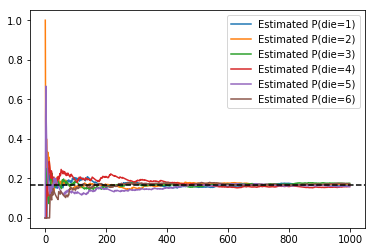

In [14]:
plt.plot(estimates[0, :].asnumpy(), label="Estimated P(die=1)")
plt.plot(estimates[1, :].asnumpy(), label="Estimated P(die=2)")
plt.plot(estimates[2, :].asnumpy(), label="Estimated P(die=3)")
plt.plot(estimates[3, :].asnumpy(), label="Estimated P(die=4)")
plt.plot(estimates[4, :].asnumpy(), label="Estimated P(die=5)")
plt.plot(estimates[5, :].asnumpy(), label="Estimated P(die=6)")
plt.axhline(y=0.16666, color='black', linestyle='dashed')
plt.legend()
plt.show()

Each solid curve corresponds to one of the six values of the die and gives our estimated probability that the die turns up that value as assessed after each of the 1000 turns.  
The dashed black line gives the true underlying probability.  
As we get more data, the solid curves converge towards the true answer.  
In our example of casting a die, we introduced the notion of a **random variable**.  
A random variable, which we denote here as $X$, can be pretty much any quantity that is not determistic.  
Random variables could take one value among a set of possibilites.  
We denote sets with brackets, like $\{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit}\}$.  
The items contained in the set are called *elements*, and we can say that an element $x$ is *in* the set $S$, by writing $x \in S$.  
The symbol $\in$ is read as "in" and denotes membership.  
For instance, we could truthfully say $\mathrm{dog} \in \{\mathrm{cat}, \mathrm{dog}, \mathrm{rabbit}\}$.  
When dealing with the rolls of die, we are concerned with a variable $X \in \{1, 2, 3, 4, 5, 6\}$.  

Note that there is a subtle difference between **discrete** random variables, like the sides of a dice, and **continuous** ones, like the weight and the height of a person.  
There’s little point in asking whether two people have exactly the same height.  
If we take precise enough measurements you’ll find that no two people on the planet have the exact same height.  
In fact, if we take a fine enough measurement, you will not have the same height when you wake up and when you go to sleep.  
So there’s no purpose in asking about the probability that some one is 2.00139278291028719210196740527486202 meters tall.  
The probability is 0.  
It makes more sense in this case to ask whether someone’s height falls into a given interval, say between 1.99 and 2.01 meters.  
In these cases we quantify the likelihood that we see a value as a density.  
The height of exactly 2.0 meters has no probability, but nonzero density.  
Between any two different heights we have nonzero probability.


There are a few important axioms of probability that you'll want to remember:  
* For any event $z$, the probability is never negative, i.e. $\Pr(Z=z) \geq 0$.  
* For any two events $Z=z$ and $X=x$ the union is no more likely than the sum of the individual events, i.e. $\Pr(Z=z \cup X=x) \leq \Pr(Z=z) + \Pr(X=x)$.  
* For any random variable, the probabilities of all the values it can take must sum to 1 $\sum_{i=1}^n P(Z=z_i) = 1$.  
* For any two mutually exclusive events $Z=z$ and $X=x$, the probability that either happens is equal to the sum of their individual probabilities that $\Pr(Z=z \cup X=x) = \Pr(Z=z) + \Pr(X=z)$.

## Dealing with multiple random variables

Very often, we’ll want consider more than one random variable at a time.  
For instance, we may want to model the relationship between diseases and symptoms.  
Given a disease and symptom, say ‘flu’ and ‘cough’, either may or may not occur in a patient with some probability.  
While we hope that the probability of both would be close to zero, we may want to estimate these probabilities and their relationships to each other so that we may apply our inferences to effect better medical care.  
As a more complicated example, images contain millions of pixels, thus millions of random variables.  
And in many cases images will come with a label, identifying objects in the image.  
We can also think of the label as a random variable.  
We can even get crazy and think of all the metadata as random variables such as location, time, aperture, focal length, ISO, focus distance, camera type, etc.  
All of these are random variables that occur jointly.  
When we deal with multiple random variables, there are several quantities of interest.  
The first is called the joint distribution $\Pr(A, B)$.  
Given any elements $a$ and $b$, the joint distribution lets us answer, what is the probability that $A=a$ and $B=b$ simultaneously?  
It might be clear that for any values $a$ and $b$, $\Pr(A,B) \leq \Pr(A=a)$.

This has to be the case, since for $A$ and $B$ to happen, $A$ has to happen and $B$ also has to happen (and vice versa). Thus $A,B$ cannot be more likely than $A$ or $B$ individually.  
This brings us to an interesting ratio:  
$$0 \leq \frac{\Pr(A,B)}{\Pr(A)} \leq 1$$.  
We call this a conditional probability and denote it by $\Pr(B|A)$, which is the probability that $B$ happens, provided that $A$ has happened.  
Using the definition of conditional probabilities, we can derive one of the most useful and celebrated equations in statistics - Bayes’ theorem.  
It goes as follows:  
By construction, we have that $\Pr(A, B) = \Pr(B|A) \Pr(A)$.  
By symmetry, this also holds for $\Pr(A,B) = \Pr(A|B) \Pr(B)$.  
Solving for one of the conditional variables we get:  

$$\Pr(A|B) = \frac{\Pr(B|A) \Pr(A)}{\Pr(B)}$$

This is very useful if we want to infer one thing from another, say cause and effect but we only know the properties in the reverse direction.  
One important operation that we need to make this work is **marginalization**, meaning the operation of determining $\Pr(A)$ and $\Pr(B)$ from $\Pr(A,B)$.  
We can see that the probability of seeing $A$ amounts to accounting for all possible choices of $B$ and aggregating the joint probabilities over all of them:  

$$\Pr(A) = \sum_{B'} \Pr(A,B') \text{ and } \Pr(B) = \sum_{A'} \Pr(A',B)$$

A really useful property to check is for dependence and independence.  
Independence is when the occurrence of one event does not influence the occurrence of the other.  
In this case $\Pr(B|A) = \Pr(B)$.  
Statisticians typically use $A \perp\!\!\!\perp B$ to express this.  
From Bayes Theorem it follows immediately that also $\Pr(A|B) = \Pr(A)$.  
In all other cases we call $A$ and $B$ dependent.  
For instance, two successive rolls of a dice are independent.  
On the other hand, the position of a light switch and the brightness in the room are not (they are not perfectly deterministic, though, since we could always have a broken lightbulb, power failure, or a broken switch).  

Let's put our skills to the test.  
Assume that a doctor administers an AIDS test to a patient.  
This test is fairly accurate and fails only with 1% probability if the patient is healthy by reporting him as diseased and that it never fails to detect HIV if the patient actually has it.  
We use $D$ to indicate the diagnosis and $H$ to denote the HIV status.  
Written as a table the outcome $\Pr(D|H)$ looks as follows:  

| | Patient is HIV positive | Patient is HIV negative |
|:------------|------------------------:|------------------------:|  
|Test positive| 1 | 0.01 |
|Test negative| 0 | 0.99 |

Note that the column sums are all one (but the row sums aren't) since the conditional probability needs to sum up to $1$, just like the probability.  
Let us work out the probability of the patient having AIDS if the test comes back positive.  
Obviously this is going to depend on how common the disease is, since it affects the number of false alarms.  
Assume that the population is quite healthy, e.g. $\Pr(\text{HIV positive}) = 0.0015$.  
To apply Bayes Theorem we need to determine  

$$\Pr(\text{Test positive}) = \Pr(D=1|H=0) \Pr(H=0) + \Pr(D=1|H=1) \Pr(H=1) = 0.01 \cdot 0.9985 + 1 \cdot 0.0015 = 0.011485$$  
Hence we get $\Pr(H = 1|D = 1) = \frac{\Pr(D=1|H=1) \Pr(H=1)}{\Pr(D=1)} = \frac{1 \cdot 0.0015}{0.011485} = 0.131$  
In other words, there's only a 13.1% chance that the patient actually has AIDS, despite using a test that is 99% accurate!  
As we can see, statistics can be quite counterintuitive.

## Conditional independence

What should a patient do upon receiving such terrifying news?  
Likely, he/she would ask the physician to administer another test to get clarity.  
The second test has different characteristics (it isn't as good as the first one).  

| | Patient is HIV positive | Patient is HIV negative |
|:------------|------------------------:|------------------------:|
|Test positive| 0.98 | 0.03 |
|Test negative| 0.02 | 0.97 |

Unfortunately, the second test comes back positive, too.  

Let us work out the requisite probabilities to invoke Bayes' Theorem.  

* $\Pr(D_1 = 1 \text{ and } D_2 = 1|H = 0) = 0.01 \cdot 0.03 = 0.0001$  
* $\Pr(D_1 = 1 \text{ and } D_2 = 1|H = 1) = 1 \cdot 0.98 = 0.98$  
* $\Pr(D_1 = 1 \text{ and } D_2 = 1) = 0.0001 \cdot 0.9985 + 0.98 \cdot 0.0015 = 0.00156985$  
* $\Pr(H = 1|D_1 = 1 \text{ and } D_2 = 1) = \frac{0.98 \cdot 0.0015}{0.00156985} = 0.936$  

That is, the second test allowed us to gain much higher confidence that not all is well.  
Despite the second test being considerably less accurate than the first one it still improved our estimate quite a bit.  

*Why couldn't we just run the first test a second time?*  
*After all, the first test was more accurate.*  

The reason is that we needed a second test that confirmed *independently* of the first test that things were dire, indeed.  
In other words, we made the tacit assumption that  
$$\Pr(D_1, D_2|H) = \Pr(D_1|H) \Pr(D_2|H)$$ 
Statisticians call such random variables **conditionally independent**.  
This is expressed as  
$$D_1 \perp\!\!\!\perp D_2 | H$$

## Naive Bayes classification

Conditional independence is useful when dealing with data, since it simplifies a lot of equations.  
A popular algorithm is the Naive Bayes Classifier.  
The key assumption in it is that the attributes are all independent of each other, given the labels.  
In other words, we have:  

$$p(x|y) = \prod_i p(x_i|y)$$  

Using Bayes Theorem this leads to the classifier $p(y|x) = \frac{\prod_i p(x_i|y) p(y)}{p(x)}$.  
Unfortunately, this is still intractable, since we don't know $p(x)$.  

Fortunately, we don't need it, since we know that $\sum_y p(y|x) = 1$, hence we can always recover the normalization from $p(y|x) \propto \prod_i p(x_i|y) p(y)$.  
After all that math, it's time for some code to show how to use a Naive Bayes classifier for distinguishing digits on the MNIST classification dataset.  
The problem is that we don't actually know $p(y)$ and $p(x_i|y)$.  
So we need to *estimate* it given some training data first.  
This is what is called *training* the model.  
In the case of 10 possible classes we simply compute $n_y$, i.e. the number of occurrences of class $y$ and then divide it by the total number of occurrences.  
If we have a total of 60,000 pictures of digits and digit 4 occurs 5800 times, we estimate its probability as $\frac{5800}{60000}$.  
Likewise, to get an idea of $p(x_i|y)$ we count how many times pixel $i$ is set for digit $y$ and then divide it by the number of occurrences of digit $y$.  
This is the probability that that very pixel will be switched on.

In [15]:
import numpy as np

# Go over one observation at a time.
def transform(data, label):
    return (nd.floor(data/128)).astype(np.float32), label.astype(np.float32)

mnist_train = mx.gluon.data.vision.MNIST(train=True, transform=transform)
mnist_test = mx.gluon.data.vision.MNIST(train=False, transform=transform)

# Initialize the count statistics for p(y) and p(x_i|y).
# We initialize all numbers with a count of 1 to ensure that we don't get a division by zero.  
# Statisticians call this Laplace (or Laplacian) smoothing.
ycount = nd.ones(shape=(10))
xcount = nd.ones(shape=(784, 10))

# Now aggregate the count statistics on how frequently a pixel is on (or off) for zeros and ones.
for data, label in mnist_train:
    x = data.reshape((784,))
    y = int(label)
    ycount[y] += 1
    xcount[:, y] += x
    
# Normalize the probabilities p(x_i / y) by dividing per-pixel counts by the total count.
for i in range(10):
    xcount[:, i] = xcount[:, i] / ycount[i]
    
# Compute the probability p(y)
py = ycount / nd.sum(ycount)
py


[ 0.09871688  0.11236461  0.09930012  0.10218297  0.09736711  0.09035161
  0.09863356  0.10441593  0.09751708  0.09915014]
<NDArray 10 @cpu(0)>

Now that we have computed per-pixel counts of occurrence for all pixels, it's time to see how our model behaves.  
Time for plotting.  
We show the estimated probabilities of observing a switched-on pixel.  
These are some mean-looking digits.

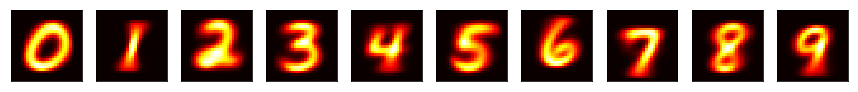


[ 0.09871688  0.11236461  0.09930012  0.10218297  0.09736711  0.09035161
  0.09863356  0.10441593  0.09751708  0.09915014]
<NDArray 10 @cpu(0)>

In [16]:
import matplotlib.pyplot as plt

fig, figarr = plt.subplots(1, 10, figsize=(15, 15))
for i in range(10):
    figarr[i].imshow(xcount[:, i].reshape((28, 28)).asnumpy(), cmap='hot')
    figarr[i].axes.get_xaxis().set_visible(False)
    figarr[i].axes.get_yaxis().set_visible(False)
plt.show()
py

Now we can compute the likelihoods of an image, given the model.  
This is statistican speak for $p(x|y)$, i.e. how likely it is to see a particular image under certain conditions (such as the label).  
Since this is computationally awkward (we might have to multiply many small numbers if many pixels have a small probability of occurring), we are better off computing its logarithm instead.  
That is, instead of $p(x|y) = \prod_{i} p(x_i|y)$, we compute $\log p(x|y) = \sum_i \log p(x_i|y)$

$$l_y := \sum_i \log p(x_i|y) = \sum_i x_i \log p(x_i = 1|y) + (1-x_i) \log \left(1-p(x_i=1|y)\right)$$  

To avoid recomputing logarithms all the time, we precompute them for all pixels.

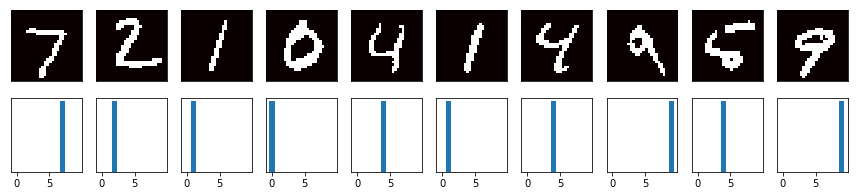

In [17]:
logxcount = nd.log(xcount)
logxcountneg = nd.log(1-xcount)
logpy = nd.log(py)

fig, figarr = plt.subplots(2, 10, figsize=(15, 3))

# Show 10 images:
ctr = 0
for data, label in mnist_test:
    x = data.reshape((784,))
    y = int(label)

    # We need to incorporate the prior probability p(y) since p(y|x) is proportional to p(x|y) p(y)
    logpx = logpy.copy()
    for i in range(10):
        # Compute the log probability for a digit:
        logpx[i] += nd.dot(logxcount[:, i], x) + nd.dot(logxcountneg[:, i], 1-x)
    # Normalize to prevent overflow or underflow by subtracting the largest value:
    logpx -= nd.max(logpx)
    # Compute the softmax using logpx:
    px = nd.exp(logpx).asnumpy()
    px /= np.sum(px)

    # Plot bar chart and image of digit:
    figarr[1, ctr].bar(range(10), px)
    figarr[1, ctr].axes.get_yaxis().set_visible(False)
    figarr[0, ctr].imshow(x.reshape((28, 28)).asnumpy(), cmap='hot')
    figarr[0, ctr].axes.get_xaxis().set_visible(False)
    figarr[0, ctr].axes.get_yaxis().set_visible(False)
    ctr += 1
    if ctr == 10:
        break

plt.show()

As we can see, this classifier is both incompetent and overly confident of its incorrect estimates.  
That is, even if it is horribly wrong, it generates probabilities close to 1 or 0.  
Not a classifier we should use very much nowadays any longer.  
While Naive Bayes classifiers used to be popular in the 80s and 90s, e.g. for spam filtering, their heydays are over.  
The poor performance is due to the incorrect statistical assumptions that we made in our model: we assumed that each and every pixel are independently generated, depending only on the label.  
This is clearly not how humans write digits, and this wrong assumption led to the downfall of our overly naive (Bayes) classifier.

## [Sampling](http://gluon.mxnet.io/chapter01_crashcourse/probability.html#Sampling)

Random numbers are just one form of random variables, and since computers are particularly good with numbers, pretty much everything else in code ultimately gets converted to numbers anyway.  
One of the basic tools needed to generate random numbers is to sample from a distribution.  
Let's start with what happens when we use a random number generator.  

In [18]:
import random 

for i in range(10):
    print(random.random())

0.9214531993481256
0.4073872304798032
0.2763039181923379
0.11035954032646811
0.3348160151074775
0.6808572560913903
0.4450396490525491
0.3194944401754555
0.19127690153782828
0.21667257306654786


### Uniform Distribution

These are some pretty random numbers.  
As we can see, their range is between 0 and 1, and they are evenly distributed.  
That is, there is (actually, should be, since this is not a real random number generator) no interval in which numbers are more likely than in any other.  
In other words, the chances of any of these numbers to fall into the interval, say (0.2,0.3) are as high as in the interval (.593264,.693264).  
The way they are generated internally is to produce a random integer first, and then divide it by its maximum range.  
If we want to have integers directly, try the following instead.  
It generates random numbers between 0 and 101.

In [19]:
for i in range(10):
    print(random.randint(1, 100))

79
63
44
13
52
32
22
93
1
46


What if we wanted to check that `randint` is actually really uniform.  
Intuitively the best strategy would be to run it, say 1 million times, count how many times it generates each one of the values and to ensure that the result is uniform.

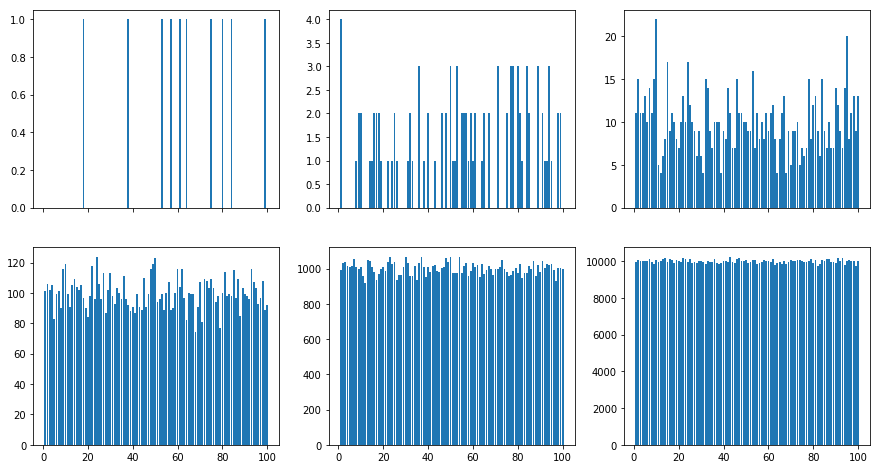

In [20]:
import math

counts = np.zeros(100)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True,)
axes = axes.reshape(6)
# The odd subplot layout is so that we can index them linearly instead of in a 2D grid.

for i in range(1, 1000001):
    counts[random.randint(0, 99)] += 1
    if i in [10, 100, 1000, 10000, 100000, 1000000]:
        axes[int(math.log10(i))-1].bar(np.arange(1, 101), counts)

plt.show()

What we can see from the above figures is that the initial number of counts looks very uneven.  
If we sample fewer than 100 draws from a distribution over 100 outcomes this is pretty much expected.  
But even for 1000 samples there is a significant variability between the draws.  
What we are really aiming for is a situation where the probability of drawing a number $x$ is given by $p(x)$.

### The categorical distribution

Quite obviously, drawing from a uniform distribution over a set of 100 outcomes is quite simple.  
But what if we have nonuniform probabilities?  
Let's start with a simple case, a biased coin which comes up heads with probability 0.35 and tails with probability 0.65.  
A simple way to sample from that is to generate a uniform random variable over $[0,1]$ and if the number is less than $0.35$, we output heads and otherwise we generate tails.  
Let's try this out.

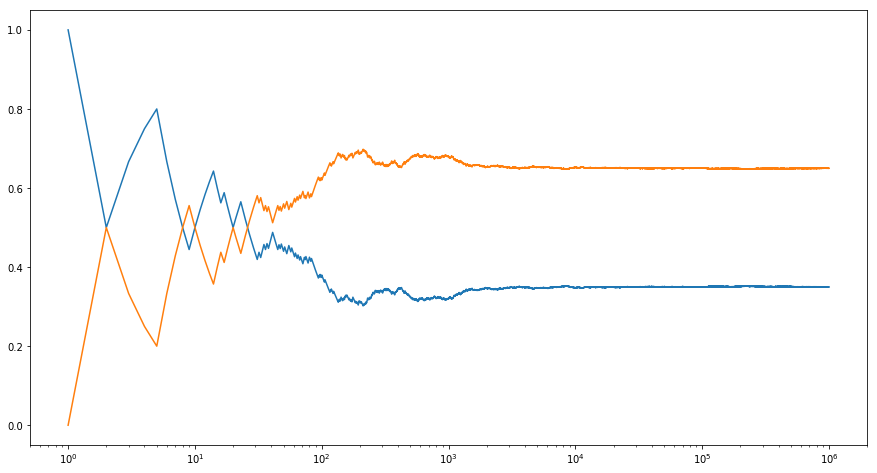

In [24]:
# Number of samples:
n = 1000000
y = np.random.uniform(0, 1, n)
x = np.arange(1, n+1)
# Count the number of occurrences and divide by the number of total draws:
p0 = np.cumsum(y < 0.35) / x
p1 = np.cumsum(y >= 0.35) / x

plt.figure(figsize=(15, 8))
plt.semilogx(x, p0)
plt.semilogx(x, p1)
plt.show()

As we can see, on average this sampler will generate 35% zeros and 65% ones.  
Now what if we have more than two possible outcomes?  
We can simply generalize this idea as follows.  
Given any probability distribution  
$p = [0.1, 0.2, 0.05, 0.3, 0.25, 0.1]$  
we can compute its cumulative distribution (Python's ``cumsum`` will do this for you)  
$F = [0.1, 0.3, 0.35, 0.65, 0.9, 1]$.  
Once we have this we draw a random variable $x$ from the uniform distribution $U[0,1]$ and then find the interval where $F[i-1] \leq x < F[i]$.  
We then return $i$ as the sample.  
By construction, the chances of hitting interval $[F[i-1], F[i])$ has probability $p(i)$.  
Note that there are many more efficient algorithms for sampling than the one above.  
For instance, binary search over $F$ will run in $O(\log n)$ time for $n$ random variables.  
There are even more clever algorithms, such as the [Alias Method](https://en.wikipedia.org/wiki/Alias_method) to sample in constant time, after $O(n)$ preprocessing.

### The Normal distribution